In [ ]:
# Data and DataFrame
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling - Random Forest and Linear Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Joblib - Exporting and saving model
from joblib import dump

In [3]:
hdb_train = pd.read_csv('data/train.csv')
hdb_train.head()

C:\Users\pinkm\AppData\Local\Temp\ipykernel_26836\3817314423.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb_train = pd.read_csv('data/train.csv')


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


# Data Pre-processing

In [4]:
hdb_train.loc[hdb_train['address'] == '215, CHOA CHU KANG CTRL', 'postal'] = '680215'
hdb_train.loc[hdb_train['address'] == '238, COMPASSVALE WALK', 'postal'] = '540238'

- There are missing values under "postal" column, we have filled the blanks with the correct postal based on their address

In [5]:
hdb_train.drop(columns=['town', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'price_per_sqft', 'hdb_age', 'residential', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'bus_stop_name', 'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'sec_sch_name', 'cutoff_point', 'affiliation'], inplace=True)

- We have dropped the features which are not required after conducting a first layer of check

In [6]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   flat_type                  150634 non-null  object 
 3   flat_model                 150634 non-null  object 
 4   lease_commence_date        150634 non-null  int64  
 5   resale_price               150634 non-null  float64
 6   Tranc_Year                 150634 non-null  int64  
 7   Tranc_Month                150634 non-null  int64  
 8   mid_storey                 150634 non-null  int64  
 9   floor_area_sqft            150634 non-null  float64
 10  max_floor_lvl              150634 non-null  int64  
 11  year_completed             150634 non-null  int64  
 12  commercial                 150634 non-null  object 
 13  total_dwelling_units       15

- There are missing values under "Mall_Nearest_Distance" column

In [7]:
hdb_train = hdb_train.dropna()
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  int64  
 1   Tranc_YearMonth            149805 non-null  object 
 2   flat_type                  149805 non-null  object 
 3   flat_model                 149805 non-null  object 
 4   lease_commence_date        149805 non-null  int64  
 5   resale_price               149805 non-null  float64
 6   Tranc_Year                 149805 non-null  int64  
 7   Tranc_Month                149805 non-null  int64  
 8   mid_storey                 149805 non-null  int64  
 9   floor_area_sqft            149805 non-null  float64
 10  max_floor_lvl              149805 non-null  int64  
 11  year_completed             149805 non-null  int64  
 12  commercial                 149805 non-null  object 
 13  total_dwelling_units       149805 

- As there is no way that we can determine the distance between the nearest mall and the property for all records, we drop the rows with nulls

In [8]:
hdb_train.duplicated().sum()

np.int64(0)

- There are no duplicate records

In [9]:
hdb_train = hdb_train.rename(columns={'Tranc_YearMonth': 'txn_YearMonth', 'Tranc_Month': 'txn_Month', 'id': 'txn_id'})
hdb_train.head()

,txn_id,txn_YearMonth,flat_type,flat_model,lease_commence_date,resale_price,Tranc_Year,txn_Month,mid_storey,floor_area_sqft,...,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,4 ROOM,Model A,2006,680000.0,2016,5,11,968.760,...,103.871731,29.427395,1.314433,103.872600,1138.633422,1.317659,103.882504,1138.633422,1.317659,103.882504
1,122598,2012-07,5 ROOM,Improved,1987,665000.0,2012,7,8,1399.320,...,103.848305,58.207761,1.345659,103.855381,415.607357,1.349783,103.854529,447.894399,1.350110,103.854892
2,170897,2013-07,EXECUTIVE,Apartment,1997,838000.0,2013,7,14,1550.016,...,103.749970,214.747860,1.344064,103.758613,498.849039,1.345245,103.756265,180.074558,1.342334,103.760013
3,86070,2012-04,4 ROOM,Model A,1992,550000.0,2012,4,3,1108.692,...,103.848305,43.396521,1.358045,103.845169,389.515528,1.354789,103.844934,389.515528,1.354789,103.844934
4,153632,2017-12,4 ROOM,Simplified,1987,298000.0,2017,12,2,893.412,...,103.832692,129.422752,1.415424,103.836477,401.200584,1.416280,103.838798,312.025435,1.414888,103.838335


- Selected columns are renamed for greater clarity 

In [10]:
hdb_train['commercial'] = hdb_train['commercial'].astype(bool)
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txn_id                     149805 non-null  int64  
 1   txn_YearMonth              149805 non-null  object 
 2   flat_type                  149805 non-null  object 
 3   flat_model                 149805 non-null  object 
 4   lease_commence_date        149805 non-null  int64  
 5   resale_price               149805 non-null  float64
 6   Tranc_Year                 149805 non-null  int64  
 7   txn_Month                  149805 non-null  int64  
 8   mid_storey                 149805 non-null  int64  
 9   floor_area_sqft            149805 non-null  float64
 10  max_floor_lvl              149805 non-null  int64  
 11  year_completed             149805 non-null  int64  
 12  commercial                 149805 non-null  bool   
 13  total_dwelling_units       149805 

- Data type for "commerical" column has been changed from Object to Boolean

In [11]:
hdb_train['postal'] = hdb_train['postal'].astype(int)
hdb_train['postal_short']= hdb_train['postal']//10000
# hdb_train['postal_short']=hdb_train['postal'].astype(str)
hdb_train['postal_short']

0         38
1         57
2         65
3         57
4         76
          ..
150629    73
150630    64
150631    41
150632    27
150633    76
Name: postal_short, Length: 149805, dtype: int64

- Wrangling for further analysis in Tableau

In [12]:
hdb_train.to_csv('train_cleaned.csv')

In [13]:
def keep_only_columns(hdb_train, columns_to_keep):

    # Verify input types
    if not isinstance(hdb_train, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")
    if not isinstance(columns_to_keep, list):
        raise TypeError("columns_to_keep must be a list")
    
    # Find columns that actually exist in the DataFrame
    existing_columns = [col for col in columns_to_keep if col in hdb_train.columns]
    
    # Warn about columns not found
    missing_columns = set(columns_to_keep) - set(existing_columns)
    if missing_columns:
        print(f"Warning: Columns not found in DataFrame: {missing_columns}")
    
    # Return DataFrame with only the specified columns
    return hdb_train[existing_columns]

In [14]:
hdb_train = keep_only_columns(hdb_train, ['resale_price', 'floor_area_sqft', 'txn_Month', 'flat_type', 'flat_model', 'year_completed', 'mrt_nearest_distance', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'mid_storey', 'planning_area'])

- We keep only the features selected for the construction of our model

# Exploratory Data Analysis

In [15]:
# Display size of our dataset

print(f'Our cleaned dataset contains: {hdb_train.shape[0]} records of resale transactions, {hdb_train.shape[1]-1} feature columns and 1 target column on resale price')

Our cleaned dataset contains: 149805 records of resale transactions, 10 feature columns and 1 target column on resale price


In [16]:
print('Top 5 most transacted Planning areas:')
hdb_train['planning_area'].value_counts()[0:5]

Top 5 most transacted Planning areas:


planning_area
Jurong West    11445
Woodlands      11299
Sengkang       10894
Tampines       10463
Yishun         10037
Name: count, dtype: int64

Getting the median values for distances to amenities:

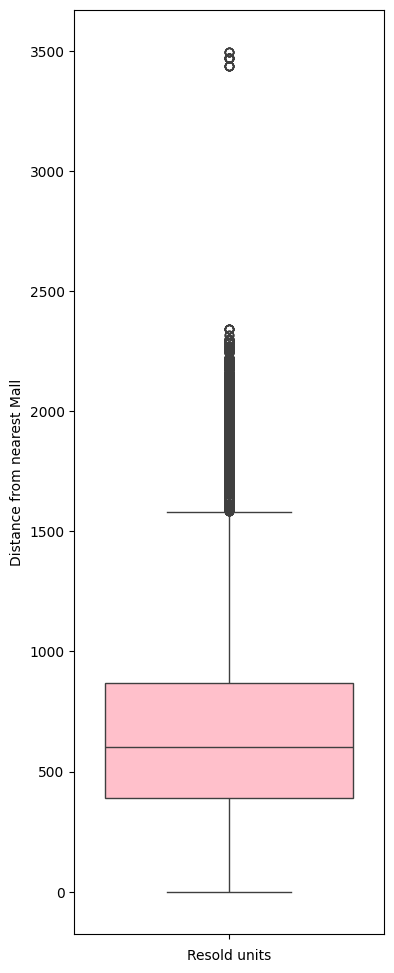

Median distance to nearest mall: 602.82m
Number of outlier units: 3055


In [17]:
# Distance to Nearest Mall
 
plt.figure(figsize=(4, 12))
sns.boxplot(data=hdb_train, y='Mall_Nearest_Distance',patch_artist=True, boxprops=dict(facecolor='pink'))

plt.xlabel('Resold units')
plt.ylabel('Distance from nearest Mall')

plt.show()

mediandist = hdb_train['Mall_Nearest_Distance'].median()
print(f'Median distance to nearest mall: {mediandist:,.2f}m')

# Finding the 75th percentile + 1.5*IQR
iqr = np.percentile(hdb_train['Mall_Nearest_Distance'], 75) - np.percentile(hdb_train['Mall_Nearest_Distance'], 25)
Upperlim = np.percentile(hdb_train['Mall_Nearest_Distance'], 75) + (1.5*iqr)

units_above_upperlim = len(hdb_train[hdb_train['Mall_Nearest_Distance'] > Upperlim])
print(f'Number of outlier units: {units_above_upperlim}')



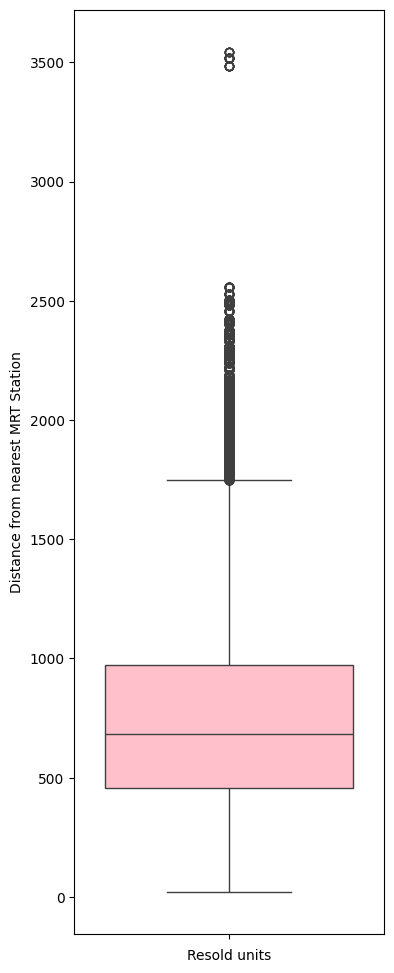

Median distance to nearest MRT Station: 681.85m
Number of outlier units: 5270


In [18]:
# Distance to Nearest MRT Station
 
plt.figure(figsize=(4, 12))
sns.boxplot(data=hdb_train, y='mrt_nearest_distance',patch_artist=True, boxprops=dict(facecolor='pink'))

plt.xlabel('Resold units')
plt.ylabel('Distance from nearest MRT Station')

plt.show()

mediandist = hdb_train['mrt_nearest_distance'].median()
print(f'Median distance to nearest MRT Station: {mediandist:,.2f}m')

# Finding the 75th percentile + 1.5*IQR
iqr = np.percentile(hdb_train['mrt_nearest_distance'], 75) - np.percentile(hdb_train['mrt_nearest_distance'], 25)
Upperlim = np.percentile(hdb_train['mrt_nearest_distance'], 75) + (1.5*iqr)

units_above_upperlim = len(hdb_train[hdb_train['mrt_nearest_distance'] > Upperlim])
print(f'Number of outlier units: {units_above_upperlim}')



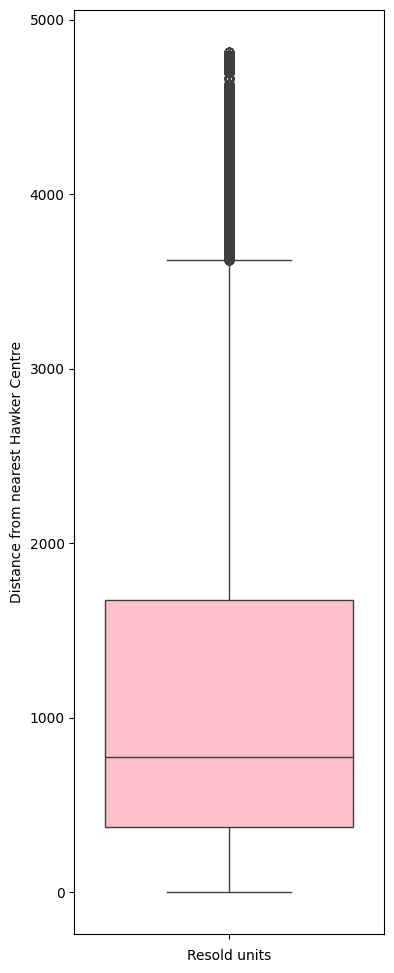

Median distance to nearest Hawker Centre: 776.14m
Number of outlier units: 8127


In [19]:
# Distance to Nearest Hawker Centre
 
plt.figure(figsize=(4, 12))
sns.boxplot(data=hdb_train, y='Hawker_Nearest_Distance',patch_artist=True, boxprops=dict(facecolor='pink'))

plt.xlabel('Resold units')
plt.ylabel('Distance from nearest Hawker Centre')

plt.show()

mediandist = hdb_train['Hawker_Nearest_Distance'].median()
print(f'Median distance to nearest Hawker Centre: {mediandist:,.2f}m')

# Finding the 75th percentile + 1.5*IQR
iqr = np.percentile(hdb_train['Hawker_Nearest_Distance'], 75) - np.percentile(hdb_train['Hawker_Nearest_Distance'], 25)
Upperlim = np.percentile(hdb_train['Hawker_Nearest_Distance'], 75) + (1.5*iqr)

units_above_upperlim = len(hdb_train[hdb_train['Hawker_Nearest_Distance'] > Upperlim])
print(f'Number of outlier units: {units_above_upperlim}')



In [20]:
categorical_cols = hdb_train.select_dtypes(include=['object', 'category']).columns

hdb_train[categorical_cols].describe()

,flat_type,flat_model,planning_area
count,149805,149805,149805
unique,7,20,32
top,4 ROOM,Model A,Jurong West
freq,60657,45786,11445


Resale flats are most frequently transacted under
- Flat Type: is 4-Room flat.
- Flat Model: Model A
- Planning Area: Jurong West


In [21]:
numerical_cols = hdb_train.select_dtypes(exclude=['object', 'category']).columns

hdb_train[numerical_cols].median()

resale_price               420000.000000
floor_area_sqft              1022.580000
txn_Month                       7.000000
year_completed               1988.000000
mrt_nearest_distance          681.853546
Mall_Nearest_Distance         602.818388
Hawker_Nearest_Distance       776.137748
mid_storey                      8.000000
dtype: float64

- Median resale transaction value: SGD420,000.00
- Median floor area (sqft) of resale flats transacted: 1022sqft
- Transactions most frequently occured in: July
- Most frequently transacted resale flats were completed in 1988. 

# Correlation Analysis

In [ ]:
# Identifying number of columns under each data type
obj = (hdb_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (hdb_train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (hdb_train.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: >

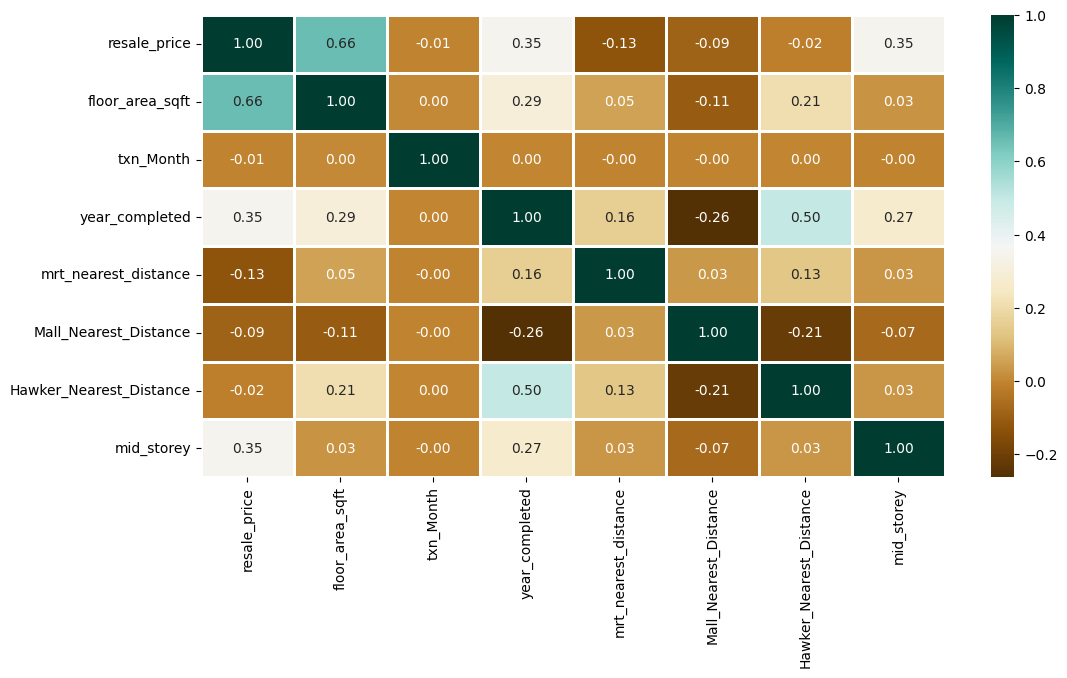

In [23]:
# Select only numerical features for correlation analysis
numerical_dataset = hdb_train.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# Random Forest Regression Model

In [25]:
# Assuming 'resale_price' is the target variable
X = hdb_train.drop(columns=['resale_price'])  # Remove the target variable
y = hdb_train['resale_price']

# Convert categorical variables into numerical (One-Hot Encoding or Label Encoding)
X = pd.get_dummies(X, drop_first=False) # False as Random Forest handles multicollinearity well

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

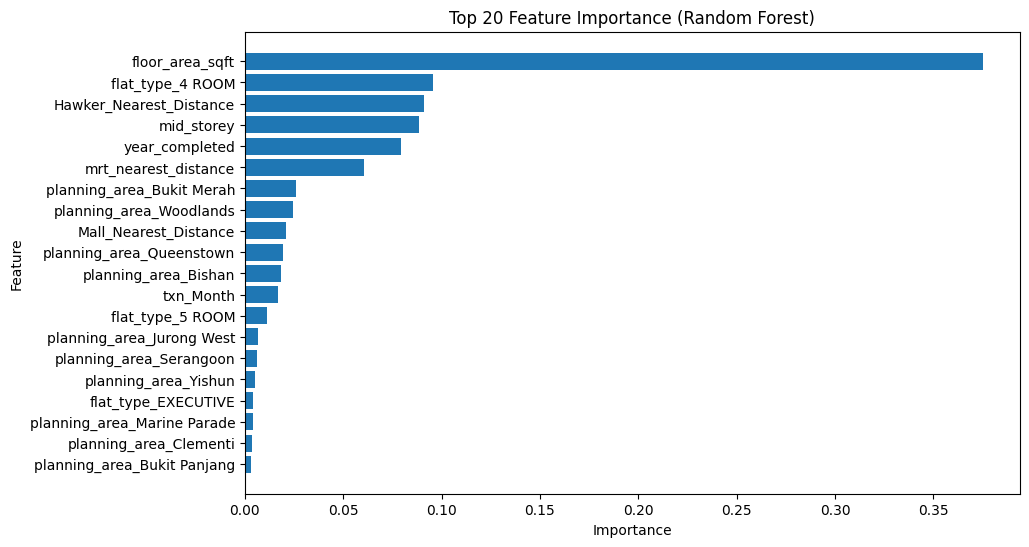

In [27]:
# Get feature importance
importance = rf.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.show()

In [29]:
# Predict on the test set
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.9287811915314137
Root Mean Squared Error: 38163.11528019007


# Streamlit

In [31]:
final_tree = rf

Saving the model as a joblib file:

In [32]:
dump(final_tree, "jjbmodel.joblib")

['jjbmodel.joblib']

# Prediction using Testing Data

In [ ]:
hdb_test = pd.read_csv('data/test.csv')
hdb_test.head()

In [ ]:
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [ ]:
hdb_test.drop(columns=['id', 'town', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'price_per_sqft', 'hdb_age', 'residential', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'bus_stop_name', 'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'sec_sch_name', 'cutoff_point', 'affiliation'], inplace=True)

- In addition to the same group of features dropped previously for the training data, "id" column is also dropped

In [ ]:
hdb_test = hdb_test.rename(columns={'Tranc_YearMonth': 'txn_YearMonth', 'Tranc_Month': 'txn_Month'})
hdb_test.head()

,txn_YearMonth,flat_type,flat_model,lease_commence_date,Tranc_Year,txn_Month,mid_storey,floor_area_sqft,max_floor_lvl,year_completed,...,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_latitude,sec_sch_longitude
0,2012-11,4 ROOM,Simplified,1987,2012,11,8,904.176,12,1986,...,103.829703,75.683952,1.437558,103.831591,426.467910,1.433681,103.832924,156.322353,1.436235,103.829987
1,2019-08,5 ROOM,Premium Apartment,2008,2019,8,5,1205.568,14,2002,...,103.697143,88.993058,1.336491,103.696319,439.756851,1.339244,103.698896,739.371688,1.335256,103.702098
2,2013-10,3 ROOM,New Generation,1980,2013,10,8,731.952,12,1979,...,103.849939,86.303575,1.374255,103.854919,355.882207,1.371893,103.851811,305.071191,1.374242,103.851430
3,2017-10,4 ROOM,New Generation,1979,2017,10,2,1044.108,14,1976,...,103.773982,108.459039,1.443650,103.773295,929.744711,1.434423,103.773698,433.454591,1.439183,103.774499
4,2016-08,4 ROOM,Model A,1985,2016,8,17,1108.692,25,1985,...,103.732225,113.645431,1.346899,103.741064,309.926934,1.349195,103.741000,217.295361,1.348351,103.740873


In [ ]:
cols_with_missing = [col for col in hdb_test.columns if hdb_test[col].isnull().any()]
print("Columns with missing values:", cols_with_missing)

Columns with missing values: ['Mall_Nearest_Distance']


In [ ]:
# Fill only selected columns with their median
columns_to_fill = ['Mall_Nearest_Distance']
for col in columns_to_fill:
    hdb_test[col] = hdb_test[col].fillna(hdb_test[col].median())

In [ ]:
cols_with_missing = [col for col in hdb_test.columns if hdb_test[col].isnull().any()]
print("Columns with missing values:", cols_with_missing)

Columns with missing values: []


In [ ]:
def keep_only_columns(hdb_test, columns_to_keep):

    # Verify input types
    if not isinstance(hdb_test, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")
    if not isinstance(columns_to_keep, list):
        raise TypeError("columns_to_keep must be a list")
    
    # Find columns that actually exist in the DataFrame
    existing_columns = [col for col in columns_to_keep if col in hdb_test.columns]
    
    # Warn about columns not found
    missing_columns = set(columns_to_keep) - set(existing_columns)
    if missing_columns:
        print(f"Warning: Columns not found in DataFrame: {missing_columns}")
    
    # Return DataFrame with only the specified columns
    return hdb_test[existing_columns]

In [ ]:
hdb_test = keep_only_columns(hdb_test, ['floor_area_sqft', 'txn_Month', 'flat_type', 'flat_model', 'year_completed', 'mrt_nearest_distance', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'mid_storey', 'planning_area'])

- Resale price, or the Target, is already not in the testing dataset

In [ ]:
hdb_test.describe()

,floor_area_sqft,txn_Month,year_completed,mrt_nearest_distance,Mall_Nearest_Distance,Hawker_Nearest_Distance,mid_storey
count,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000
mean,1043.288014,6.571309,1990.804624,766.780730,661.200796,1170.734627,8.276394
std,263.155328,3.338882,12.245973,430.837778,366.381636,1078.996296,5.503939
min,333.684000,1.000000,1949.000000,21.971410,0.000000,8.681508,2.000000
25%,796.536000,4.000000,1983.000000,458.361406,390.827756,367.042734,5.000000
50%,1022.580000,7.000000,1989.000000,685.933955,601.947831,771.501451,8.000000
75%,1205.568000,9.000000,1999.000000,980.990779,866.776407,1677.415462,11.000000
max,2863.224000,12.000000,2018.000000,3544.504228,3496.402910,4816.062542,50.000000


In [ ]:
hdb_test['flat_type'].value_counts()

flat_type
4 ROOM              6867
3 ROOM              4364
5 ROOM              3992
EXECUTIVE           1264
2 ROOM               235
MULTI-GENERATION       8
1 ROOM                 7
Name: count, dtype: int64

In [ ]:
hdb_test['flat_model'].value_counts()

flat_model
Model A                   5239
Improved                  4201
New Generation            2552
Premium Apartment         1716
Simplified                 829
Apartment                  646
Standard                   567
Maisonette                 453
Model A2                   258
DBSS                       150
Adjoined flat               30
Model A-Maisonette          29
Type S1                     29
Type S2                     12
Terrace                     10
Multi Generation             8
Premium Apartment Loft       4
Improved-Maisonette          2
Premium Maisonette           2
Name: count, dtype: int64

In [ ]:
hdb_test['planning_area'].value_counts()

planning_area
Jurong West                1246
Woodlands                  1242
Sengkang                   1242
Tampines                   1140
Yishun                     1096
Bedok                      1015
Punggol                     865
Ang Mo Kio                  824
Hougang                     803
Choa Chu Kang               713
Bukit Merah                 655
Bukit Batok                 649
Bukit Panjang               646
Toa Payoh                   560
Pasir Ris                   537
Queenstown                  466
Geylang                     434
Sembawang                   401
Clementi                    389
Kallang                     369
Serangoon                   349
Jurong East                 335
Bishan                      330
Novena                      123
Marine Parade               121
Outram                       85
Rochor                       45
Bukit Timah                  41
Changi                        6
Downtown Core                 6
Tanglin                   

In [ ]:
# Create dummy variables for categorical columns

hdb_test_encoded = pd.get_dummies(hdb_test)

In [ ]:
# Ensure test data has the same columns as training data
# (Missing columns in test data will cause errors)

train_columns = X_train.columns
hdb_test_encoded = hdb_test_encoded.reindex(columns=train_columns, fill_value=0)

In [ ]:
X_train

,floor_area_sqft,txn_Month,year_completed,mrt_nearest_distance,Mall_Nearest_Distance,Hawker_Nearest_Distance,mid_storey,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,...,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun
42742,1097.928,4,1998,626.722064,431.095361,2247.554935,14,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6424,1119.456,9,1983,255.128600,222.197180,787.255111,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9814,1313.208,4,1997,1210.589716,1336.019112,1889.400880,3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80346,688.896,8,1987,818.081528,741.338361,373.330864,2,False,False,True,...,False,False,False,False,False,False,False,False,False,False
104367,1119.456,4,1987,976.891207,986.132593,991.102436,2,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120571,1054.872,8,1981,578.590539,594.513293,688.339966,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104295,1323.972,11,1992,355.052421,310.405865,473.156503,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
132680,1184.040,11,2000,676.497780,586.924851,1753.471188,5,False,False,False,...,False,False,True,False,False,False,False,False,False,False
147681,1237.860,6,2000,1653.012671,538.888544,1091.329790,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
hdb_test_encoded

,floor_area_sqft,txn_Month,year_completed,mrt_nearest_distance,Mall_Nearest_Distance,Hawker_Nearest_Distance,mid_storey,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,...,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun
0,904.176,11,1986,686.660434,877.431572,687.576779,8,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1205.568,8,2002,169.478175,534.037705,2122.346226,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,731.952,10,1979,694.220448,817.050453,152.287621,8,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1044.108,10,1976,1117.203587,1272.737194,501.892158,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1108.692,8,1985,987.976010,1070.963675,437.593564,17,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,882.648,6,1980,674.098299,1120.535819,226.144646,5,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16733,990.288,8,2010,452.475847,519.046576,4254.303044,17,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16734,1184.040,3,2000,739.510043,685.922630,3917.745229,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16735,904.176,11,1987,877.694888,846.849200,773.521588,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Use the trained Random Forest model to predict
y_pred = rf.predict(hdb_test_encoded)

In [ ]:
hdb_test_sub = pd.read_csv('data/test.csv')

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_23376\1532567519.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb_test_sub = pd.read_csv('data/test.csv')


In [ ]:
hdb_test_sub['Predicted'] = y_pred
hdb_test_sub.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,Predicted
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,...,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987,310740.000000
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,...,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098,462251.740000
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430,294043.533333
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,...,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499,298473.880000
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,...,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873,381393.566667


In [ ]:
hdb_test_sub = hdb_test_sub[['id', 'Predicted']]
hdb_test_sub.head()

,id,Predicted
0,114982,310740.000000
1,95653,462251.740000
2,40303,294043.533333
3,109506,298473.880000
4,100149,381393.566667


In [ ]:
type(hdb_test_sub)

pandas.core.frame.DataFrame

In [ ]:
hdb_test_sub = hdb_test_sub.rename(columns={'id': 'Id'})
hdb_test_sub.head()

,Id,Predicted
0,114982,310740.000000
1,95653,462251.740000
2,40303,294043.533333
3,109506,298473.880000
4,100149,381393.566667


In [ ]:
hdb_test_sub.to_csv('sub_reg.csv', index=False)

# Baseline Linear Regression Model

In [ ]:
scaler = StandardScaler(with_mean=False)  # Avoid breaking sparse one-hot encoded features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.8607086718691211
Root Mean Squared Error: 53371.38920421037
